In [1]:
# Association Rules

# load data ########################################################################################

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML

In [2]:
df=pd.read_csv('income_evaluation.csv')
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

In [3]:
# check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())

ColumnName, DataType, MissingValues
age , int64 , False
 workclass , object , False
 fnlwgt , int64 , False
 education , object , False
 education-num , int64 , False
 marital-status , object , False
 occupation , object , False
 relationship , object , False
 race , object , False
 sex , object , False
 capital-gain , int64 , False
 capital-loss , int64 , False
 hours-per-week , int64 , False
 native-country , object , False
 income , object , False


In [4]:
display(HTML(df.head(20).to_html()))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [5]:
df=df.replace([' ?'], 'unknown')
display(HTML(df.head(20).to_html()))

In [6]:
df.columns = df.columns.str.replace(" ", "")
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
# We ignore the label column
y = df['income']
df_kmeans=df.drop('income',axis=1)
display(HTML(df_kmeans.head(10).to_html()))

In [8]:
dfk=df_kmeans.copy(deep=True)
dfk['age'] = pd.cut(dfk['age'],3)
dfk['fnlwgt'] = pd.cut(dfk['fnlwgt'],3)
dfk['education-num'] = pd.cut(dfk['education-num'],3)
dfk['capital-gain'] = pd.cut(dfk['capital-gain'],3)
dfk['capital-loss'] = pd.cut(dfk['capital-loss'],3)
dfk['hours-per-week'] = pd.cut(dfk['hours-per-week'],3)


display('Data Example',HTML(dfk.head(5).to_html()))

'Data Example'

In [9]:
print(dfk.dtypes)

age               category
workclass           object
fnlwgt            category
education           object
education-num     category
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain      category
capital-loss      category
hours-per-week    category
native-country      object
dtype: object


In [10]:
# convert all columns to strings
dfk = dfk.astype(str)
dfk['age'] = 'age=' + dfk['age'].astype(str)
dfk['fnlwgt'] = 'fnlwgt=' + dfk['fnlwgt'].astype(str)
dfk['education-num'] = 'education-num=' + dfk['education-num'].astype(str)
dfk['capital-gain'] = 'capital-gain=' + dfk['capital-gain'].astype(str)
dfk['capital-loss'] = 'capital-loss=' + dfk['capital-loss'].astype(str)
dfk['hours-per-week'] = 'hours-per-week=' + dfk['hours-per-week'].astype(str)

In [11]:
# convert data frame to lists
df_arr = dfk.stack().groupby(level=0).apply(list).tolist()

In [12]:
print(dfk.dtypes)

age               object
workclass         object
fnlwgt            object
education         object
education-num     object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain      object
capital-loss      object
hours-per-week    object
native-country    object
dtype: object


In [18]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt  

# convert data frame to lists
df_arr = dfk.stack().groupby(level=0).apply(list).tolist()

# Encode lists to transactions
te = TransactionEncoder()
df_transactions = te.fit_transform(df_arr)
# covnert the values to booleans: TRUE and FALSE
df_rules = pd.DataFrame(df_transactions,columns=te.columns_)
display('Data Example',HTML(df_rules.head(5).to_html()))

frequent_itemsets = apriori(df_rules, min_support=0.85, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
display('Rules',HTML(rules.to_html()))

'Data Example'

'Rules'

In [14]:
# Outlier Detection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor


# Data preprocessing ################################################################################
# Prepare a numerical feature matrix, better to be normalized
print('Column Datatypes:\n',df.dtypes)
# convert all nominal variables to binary variables
df_raw=df.copy(deep=True) 
dfk=df.copy(deep=True) 
df_dummies = pd.get_dummies(df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']])
df_dummies
df_dummies.dtypes

dfk = df.join(df_dummies)
dfk = dfk.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income'], axis=1)
dfk = dfk.drop(['workclass_ Federal-gov','education_ 10th','marital-status_ Divorced','occupation_ Adm-clerical','relationship_ Husband','race_ Amer-Indian-Eskimo','sex_ Female','native-country_ Cambodia'],1)

display(HTML(dfk.head(5).to_html()))

# Normalized all numerical features
# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = dfk.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    

# min-max normalization to scale [0, 1]
for col in cols_numeric:
    dfk[col]=(dfk[col]-dfk[col].min())/(dfk[col].max()-dfk[col].min())

#dfk=dfk.drop("income",1)
display(HTML(dfk.head(10).to_html()))

Column Datatypes:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


Selected numerical columns:
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


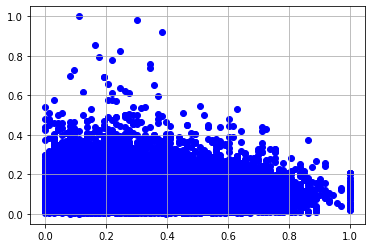

outlier indices:  (array([    8,    13,    15, ..., 32549, 32551, 32556]),)


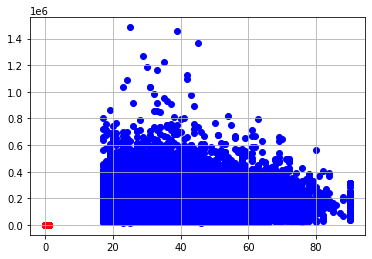

In [15]:
# API, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor

# plot data points
plt.scatter(dfk["age"], dfk["fnlwgt"], color = "b")
plt.grid()
plt.show()

# model specification
model1 = LocalOutlierFactor(n_neighbors = 3, metric = "euclidean")
# model fitting
y_pred = model1.fit_predict(dfk)
# filter outlier index
outlier_index = np.where(y_pred == -1) # negative values are outliers 
print("outlier indices: ", outlier_index)
# filter outlier values
outlier_values = dfk.iloc[outlier_index]
# plot data
plt.scatter(df["age"], df["fnlwgt"], color = "b")
# plot outlier values
plt.scatter(outlier_values["age"], outlier_values["fnlwgt"], color = "r")
plt.grid()
plt.show()

In [21]:
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

le=preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)


dfk['income'] = y_encoded

# calculate summary statistics
data_mean, data_std = mean(dfk), std(dfk)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off


In [22]:
outlier_index

new_df = dfk.drop(dfk.index[outlier_index])


'''from scipy.stats import zscore

z_scores = zscore(dfk)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = dfk[filtered_entries]'''

'from scipy.stats import zscore\n\nz_scores = zscore(dfk)\n\nabs_z_scores = np.abs(z_scores)\nfiltered_entries = (abs_z_scores < 3).all(axis=1)\nnew_df = dfk[filtered_entries]'

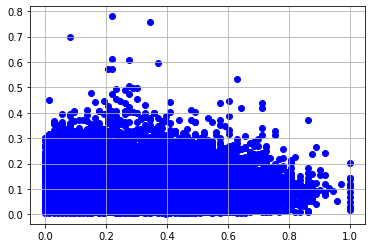

In [23]:
plt.scatter(new_df["age"], new_df["fnlwgt"], color = "b")
plt.grid()
plt.show()

In [24]:
#kmean algorithm
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

y_encoded = new_df['income']
x=new_df

x = x.iloc[:, :-1]
x

age    fnlwgt  ...  native-country_ Yugoslavia  native-country_unknown
0      0.301370  0.044302  ...                           0                       0
1      0.452055  0.048238  ...                           0                       0
2      0.287671  0.138113  ...                           0                       0
3      0.493151  0.151068  ...                           0                       0
4      0.150685  0.221488  ...                           0                       0
...         ...       ...  ...                         ...                     ...
32555  0.068493  0.202298  ...                           0                       0
32557  0.315068  0.096500  ...                           0                       0
32558  0.561644  0.094827  ...                           0                       0
32559  0.068493  0.128499  ...                           0                       0
32560  0.479452  0.187203  ...                           0                       0

[24004 rows x 100 columns]

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.2 )

In [26]:
#building the model

for k in range(1, 24, 2):
  clf = neighbors.KNeighborsClassifier(k, weights='uniform')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro'),', Recall: ', recall_score(y_test, y_pred, average='micro')) 
  


K = 1 , Accuracy:  0.7885857113101438 , Precision:  0.7885857113101438 , Recall:  0.7885857113101438
K = 3 , Accuracy:  0.8104561549677151 , Precision:  0.8104561549677151 , Recall:  0.8104561549677151
K = 5 , Accuracy:  0.8185794626119558 , Precision:  0.8185794626119558 , Recall:  0.8185794626119558
K = 7 , Accuracy:  0.8262861903770048 , Precision:  0.8262861903770048 , Recall:  0.8262861903770048
K = 9 , Accuracy:  0.8312851489273068 , Precision:  0.8312851489273068 , Recall:  0.8312851489273068
K = 11 , Accuracy:  0.8321183086856905 , Precision:  0.8321183086856905 , Recall:  0.8321183086856905
K = 13 , Accuracy:  0.8325348885648823 , Precision:  0.8325348885648823 , Recall:  0.8325348885648823
K = 15 , Accuracy:  0.8317017288064986 , Precision:  0.8317017288064986 , Recall:  0.8317017288064986
K = 17 , Accuracy:  0.8331597583836701 , Precision:  0.8331597583836701 , Recall:  0.8331597583836701
K = 19 , Accuracy:  0.8339929181420538 , Precision:  0.8339929181420538 , Recall:  0.83

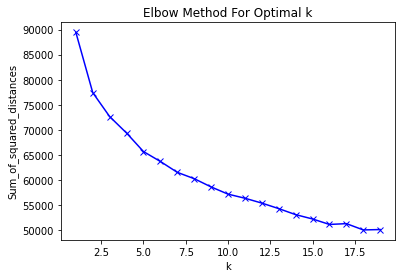

In [27]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot K and SSE, observe which one is better
# In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()